In [2]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import os
import sys
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import utils

In [4]:
df2 = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [5]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head(6)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030
5,2010-09-01 05:00:00,15.8,1232.000,3.69,19.160


In [6]:
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [7]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

- No null values

In [8]:
df.shape

(92016, 5)

In [9]:
df.index = pd.to_datetime(df.FullDate)
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,,
2010-09-01 00:00:00,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
2021-02-28 19:00:00,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [10]:

daily_sample_df = df.resample('D').sum()
daily_sample_df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [11]:
df_copy1 = daily_sample_df.copy()

In [12]:
df_copy1.reset_index(inplace = True)
df_copy1.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [13]:
df_copy1.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [14]:
model_df = df_copy1[['FullDate', 'ElecPrice']]

In [15]:
model_df.rename(columns = {'FullDate' : "ds", 'ElecPrice' : 'y'}, inplace = True)

In [16]:
x = len(model_df)
z = x-2757
z

1077

In [17]:
train = model_df[0:2757]
test = model_df[2757:]

print(train.shape)
print(test.shape)

(2757, 2)
(1077, 2)


In [18]:
train

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015


In [19]:
#!pip install pystan --q

In [20]:
from prophet import Prophet

In [21]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppw_hq2ck/pb28zp5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppw_hq2ck/tjyy1s32.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39610', 'data', 'file=/tmp/tmppw_hq2ck/pb28zp5n.json', 'init=/tmp/tmppw_hq2ck/tjyy1s32.json', 'output', 'file=/tmp/tmpcfpwtvzy/prophet_model-20221005084703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:47:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast

In [22]:
future = model.make_future_dataframe(periods=len(test), freq="D")
forecast= model.predict(future)
#forecast = forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,835.859438,-1400.093180,3524.681807,835.859438,835.859438,143.888200,143.888200,143.888200,159.358259,159.358259,159.358259,-15.470060,-15.470060,-15.470060,0.0,0.0,0.0,979.747638
1,2010-09-02,835.856944,-1384.593952,3423.479627,835.856944,835.856944,224.280665,224.280665,224.280665,257.111039,257.111039,257.111039,-32.830374,-32.830374,-32.830374,0.0,0.0,0.0,1060.137609
2,2010-09-03,835.854449,-1603.446949,3175.695645,835.854449,835.854449,-0.651278,-0.651278,-0.651278,50.277970,50.277970,50.277970,-50.929248,-50.929248,-50.929248,0.0,0.0,0.0,835.203171
3,2010-09-04,835.851955,-1851.926490,2886.994840,835.851955,835.851955,-340.869421,-340.869421,-340.869421,-271.436963,-271.436963,-271.436963,-69.432458,-69.432458,-69.432458,0.0,0.0,0.0,494.982534
4,2010-09-05,835.849460,-2132.784137,2682.261955,835.849460,835.849460,-430.753978,-430.753978,-430.753978,-342.719775,-342.719775,-342.719775,-88.034203,-88.034203,-88.034203,0.0,0.0,0.0,405.095483


In [23]:
forecast.shape

(3834, 19)

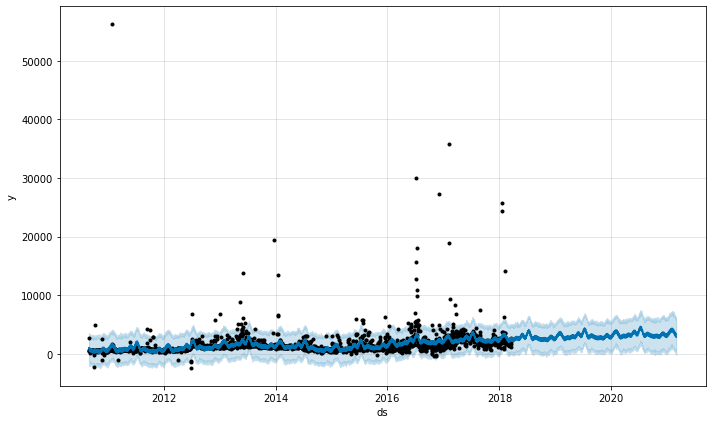

In [24]:
plot1 = model.plot(forecast)

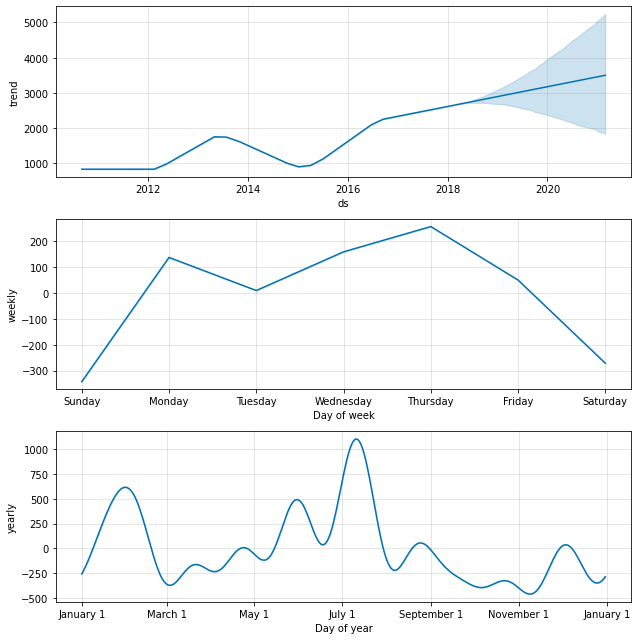

In [25]:
plot11 = model.plot_components(forecast)

In [26]:
print(f'The Mean_absolute_error is :', mean_absolute_error(test['y'], forecast['yhat'].tail(1077)))
print(f'The Mean_absolute_percentage_error is :', mean_absolute_percentage_error(test['y'], forecast['yhat'].tail(1077)))
print(f'The Mean_squared_error is :', mean_squared_error(test['y'], forecast['yhat'].tail(1077)))
print(f'The RMSE is :', np.sqrt(mean_squared_error(test['y'], forecast['yhat'].tail(1077))))

The Mean_absolute_error is : 1713.1838473419002
The Mean_absolute_percentage_error is : 5.392234790260891
The Mean_squared_error is : 10218510.602006782
The RMSE is : 3196.6405181075306


- Multivariate Time Series Forecasting

In [27]:
df_copy2 = df_copy1.copy()
df_copy2

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [28]:
df_copy2.rename(columns = {'FullDate' : "ds", 'ElecPrice' : 'y', 'SysLoad' : 'add1', 'Tmax': 'add2', 'GasPrice': 'add3'}, inplace = True)

In [29]:
a = len(df_copy2)
b = a - 2757

In [30]:
train2 = df_copy2[:2757]
test2 = df_copy2[2757:]

train2.shape, test2.shape

((2757, 5), (1077, 5))

In [31]:
train2

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


In [32]:
model2 = Prophet()

In [33]:
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [34]:
model2.fit(train2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppw_hq2ck/67_om_8n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppw_hq2ck/8qtjywsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76061', 'data', 'file=/tmp/tmppw_hq2ck/67_om_8n.json', 'init=/tmp/tmppw_hq2ck/8qtjywsb.json', 'output', 'file=/tmp/tmpa6y3bgmp/prophet_model-20221005084711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:47:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:47:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
train2.columns

Index(['ds', 'add2', 'add1', 'add3', 'y'], dtype='object')

In [36]:
future2 = model2.make_future_dataframe(periods=len(test2), freq="D")
future2['add1'] = df_copy2['add1'].values
future2['add2'] = df_copy2['add2'].values
future2['add3'] = df_copy2['add3'].values

future2

,ds,add1,add2,add3
0,2010-09-01,41565.38000,379.2,88.5600
1,2010-09-02,38898.99000,369.6,88.5600
2,2010-09-03,41665.76000,439.2,106.8000
3,2010-09-04,35638.08500,328.8,81.3600
4,2010-09-05,35611.41000,357.6,106.8000
...,...,...,...,...
3829,2021-02-24,-1525.49745,537.6,134.4000
3830,2021-02-25,4539.07855,518.4,130.5048
3831,2021-02-26,9517.02430,547.2,130.1808
3832,2021-02-27,4932.88015,564.0,130.0800


In [37]:
forecast2= model2.predict(future2)
forecast2 = forecast2[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
forecast2.head()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,1520.781475,-832.389596,3661.635565,1001.195139,1001.195139,1001.195139
1,2010-09-02,1472.400650,-756.756811,3572.552306,1001.669518,1001.669518,1001.669518
2,2010-09-03,1701.685867,-486.875505,3990.968359,1002.143896,1002.143896,1002.143896
3,2010-09-04,916.338987,-1339.477597,3053.140882,1002.618275,1002.618275,1002.618275
4,2010-09-05,1333.551140,-753.478033,3463.913471,1003.092654,1003.092654,1003.092654


In [38]:
forecast2.shape

(3834, 7)

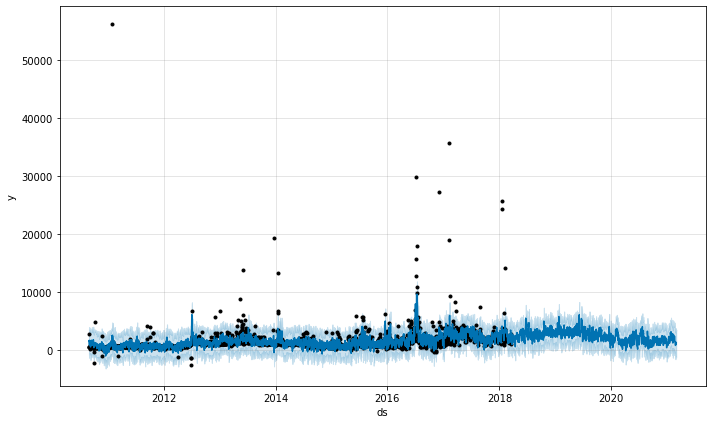

In [39]:
plot12 = model2.plot(forecast2)

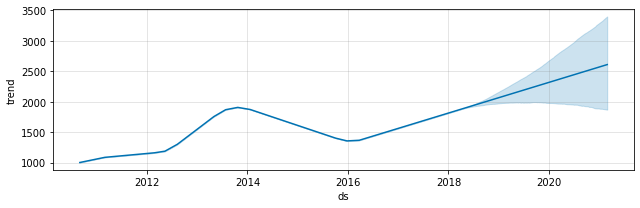

In [40]:
plot22 = model2.plot_components(forecast2)

In [41]:
print(f'The Mean_absolute_error is :', mean_absolute_error(test2['y'], forecast2['yhat'].tail(1077)))
print(f'The Mean_absolute_percentage_error is :', mean_absolute_percentage_error(test2['y'], forecast2['yhat'].tail(1077)))
print(f'The Mean_squared_error is :', mean_squared_error(test2['y'], forecast2['yhat'].tail(1077)))
print(f'The RMSE is :', np.sqrt(mean_squared_error(test2['y'], forecast2['yhat'].tail(1077))))

The Mean_absolute_error is : 987.8104542068884
The Mean_absolute_percentage_error is : 2.324348680868166
The Mean_squared_error is : 7334178.727048066
The RMSE is : 2708.1688882062112
